In [2]:
print("Versions of the runtime and packages used for this assignment:")
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))

print("-------------------------------------------------------")
print("When run on my machine the following versions were used:")
print("Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]")
print("pandas version: 1.5.3")
print("matplotlib version: 3.7.1")
print("NumPy version: 1.24.3")
print("scikit-learn version: 1.3.0")
print("mglearn version: 0.1.9")

Versions of the runtime and packages used for this assignment:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.0
mglearn version: 0.1.9
-------------------------------------------------------
When run on my machine the following versions were used:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.0
mglearn version: 0.1.9


In [3]:
from sklearn.utils import Bunch

def load_breast_cancer(relative_filepath):
    '''
    Parse data from file at specified path and extract features, labels, and instances.
    The file contains comma separated values (csv) that can be parsed into a matrix with the following structure:
    - The first row contains the names of the features followed by the label name.
    - The remaining rows contain the expression values for each feature in each instance.
      - The last column contains an encoded value for whether the cell is cancerous or not.
    Args:
        arg1 (str): relative file path to the file to be parsed
    Returns:
        Bunch: data structure to store the dataset and its relevant metadata
    '''
    number_of_columns = 6;
    first_feature_column_index = 0
    last_feature_column_index = number_of_columns - 1
    first_expression_data_row_index = 1
    header_row_index = 0

    # Parse the data from file
    raw_data = np.genfromtxt(relative_filepath, delimiter=',', dtype=str)
    # extract the instances each with 1926 features, excluding the label vector and first row of feature names
    data = raw_data[
        first_expression_data_row_index:,
        first_feature_column_index:last_feature_column_index
    ].astype(float)
    # extract the feature names from the first row
    # excluding the last two columns that are the column headers from target and target_actual
    feature_names = raw_data[
        header_row_index:first_expression_data_row_index,
        first_feature_column_index:last_feature_column_index
    ].ravel()
    # extract the label values from the second to last column
    target = raw_data[
        first_expression_data_row_index:,
        last_feature_column_index:number_of_columns
    ].astype(float).ravel()
    # Create an array of friendly names for the labels
    # whose indexes correspond to the label values
    target_names = []
    normal_breast_tissue_encoded = 0
    target_names.insert(normal_breast_tissue_encoded, 'normal breast tissue')
    primary_breast_cancer_encoded = 1
    target_names.insert(primary_breast_cancer_encoded, 'primary breast cancer')

    # summarize the data set
    description = f'''\
    Breast Cancer dataset
    --------------------

    **Data Set Characteristics:**

        :Number of Instances: 569
        :Number of Features: 5 (6 including label)
        :Feature Information:
            - mean_radius
            - mean_texture
            - mean_perimeter
            - mean_area
            - mean_smoothness
            - class (diagnosis):
                - normal breast tissue (0)
                - primary breast cancer (1)
    '''

    # Create a dictionary to store the dataset and its relevant metadata
    bunch_data = {
        'data': data,
        'target': target,
        'target_names': target_names,
        'feature_names': feature_names,
        'DESCR': description,
        'filename': relative_filepath.split('/')[-1]
    }
    # Create a Bunch object to store the dataset and its relevant metadata
    return Bunch(**bunch_data)

In [4]:
# file containing comma separated values.
# The first 1926 values are the feature names, the next is 'target', followed by 'target_actual' which all act as column labels
# The following sets of 1928 values are the instances of the dataset.
# The last two values of each set are the label name and the label value respectively
relative_filepath = './data/GSE58606_data.csv'
# load dataset from file
dataset = load_breast_cancer(relative_filepath)

In [5]:
# Explore the dataset
print("Description {}".format(dataset.DESCR))
print("Filename {}".format(dataset.filename))
print("Label Names {}".format(dataset.target_names))
print("Label Vector {}".format(dataset.target))
print("Feature Names {}".format(dataset.feature_names))
# anonymous function to format the data to 2 decimal places
withFormatter = lambda x: "{:.2f}".format(x);
# create a function that will apply the anonymous function to each element in the matrix
float_formatter = np.vectorize(withFormatter)
print("Formatted Data {}".format(float_formatter(dataset.data)))
print("Unformatted Data {}".format(dataset.data))
print("Data Shape {}".format(dataset.data.shape))

Description     Breast Cancer dataset
    --------------------

    **Data Set Characteristics:**

        :Number of Instances: 569
        :Number of Features: 5 (6 including label)
        :Feature Information:
            - mean_radius
            - mean_texture
            - mean_perimeter
            - mean_area
            - mean_smoothness
            - class (diagnosis):
                - normal breast tissue (0)
                - primary breast cancer (1)
    
Filename GSE58606_data.csv
Label Names ['normal breast tissue', 'primary breast cancer']
Label Vector [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 

In [6]:
# Since we observed clustering of the data points in the scatter matrix we can apply a supervised learning technique
from sklearn.model_selection import train_test_split

# seed to random number generator to make output deterministic when shuffling the dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
seed_to_make_output_deterministic = 2

# segregate the entire dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data,
    dataset.target,
    random_state=seed_to_make_output_deterministic,
    # 25% of the data will be used for testing
    test_size=0.25,
    # 75% of the data will be used for training
    train_size=0.75
)

print("Training data")
# X_train is the matrix of training data that excludes the label column
print("X_train: \n{}".format(X_train))
# y_train is the vector of labels that corresponds to the training data
print("y_train: \n{}".format(y_train))

print("Testing data")
# X_test is the matrix of test data that excludes the label column
print("X_test: \n{}".format(X_test))
# y_test is the vector of labels that corresponds to the test data
print("y_test: \n{}".format(y_test))

Training data
X_train: 
[[1.669e+01 2.020e+01 1.071e+02 8.576e+02 7.497e-02]
 [1.486e+01 2.321e+01 1.004e+02 6.714e+02 1.044e-01]
 [1.181e+01 1.739e+01 7.527e+01 4.289e+02 1.007e-01]
 ...
 [1.246e+01 1.283e+01 7.883e+01 4.773e+02 7.372e-02]
 [1.234e+01 1.227e+01 7.894e+01 4.685e+02 9.003e-02]
 [1.747e+01 2.468e+01 1.161e+02 9.846e+02 1.049e-01]]
y_train: 
[0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 

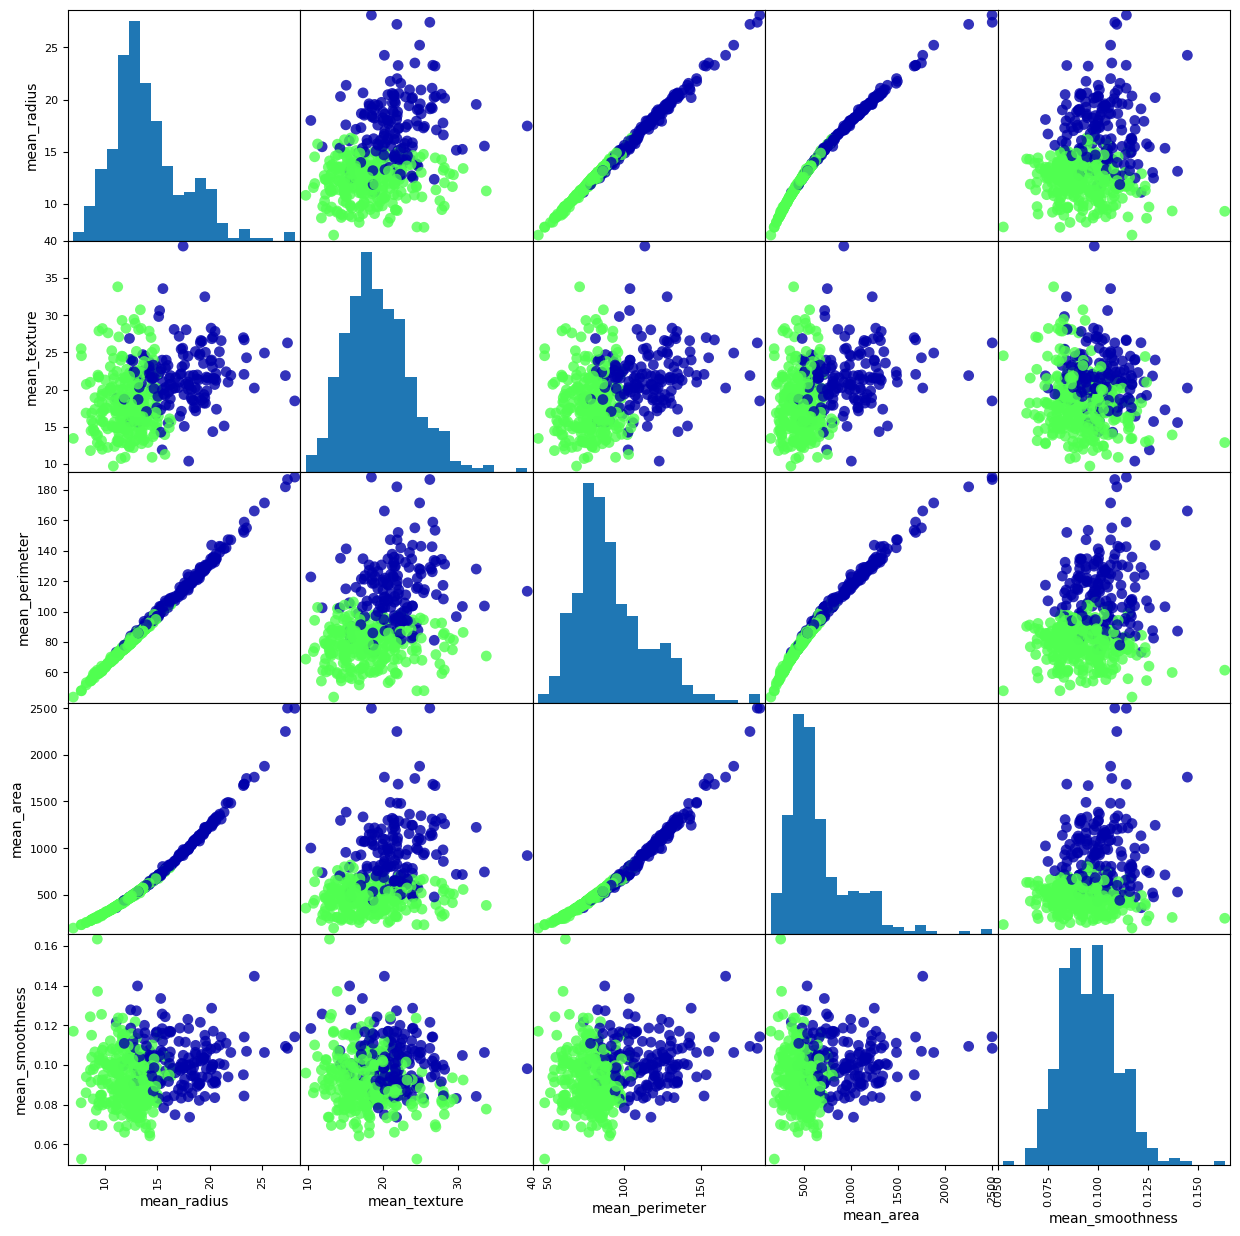

In [7]:
# Prior to applying an supervised learning technique to the dataset
# we can visualize the relationships between each combination of features
# to determine if there are any obvious relationships between the features.
# Observing clustering of the data points in the scatter matrix plot may indicate
# that the features are correlated and may be useful for classification.

# Create a dataframe from the training data.
# This data structure is convenient for tabular data and required for the scatter matrix.
dataframe = pd.DataFrame(X_train, columns=dataset.feature_names)
# Make every data point translucent so overlapping data points can be identified.
marker_opacity = 0.8
# Increase the size of the data points so they are easier to see.
marker_size = 60
# Use circles to represent the data points.
marker_shape = 'o'
# Set the size of the figure.
fifteen_inch_by_fifteen_inch_figure_size = (15, 15)
# Use the label vector to color the data points.
# Each label will correspond to a color in the color map (cmap).
marker_colors_by_class = y_train
# Set the number of intervals in the histogram.
number_of_intervals_in_histogram = 20
# Set the color map to use for the data points.
set_of_unique_marker_colors = mglearn.cm3

# create a customized scatter matrix from the dataframe.
_ = pd.plotting.scatter_matrix(
    dataframe,
    c=marker_colors_by_class,
    figsize=fifteen_inch_by_fifteen_inch_figure_size,
    marker=marker_shape,
    hist_kwds={
        'bins': number_of_intervals_in_histogram
    },
    s=marker_size,
    alpha=marker_opacity,
    cmap=set_of_unique_marker_colors
)

In [8]:
# import supervised learning algorithm since the dataset is labeled
from sklearn.neighbors import KNeighborsClassifier
# construct an instance of a K-Nearest Neighbor classifier
classifier = KNeighborsClassifier(n_neighbors=1)
# train the classifier on the training set
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# produce a vector of labels arrived at by the classifier using the testing data
y_pred = classifier.predict(X_test)

# Actual labels in the testing data set
print("Test set truths: {}".format(y_test))
# Predicted labels by the classifier
print("Test set truths: {}".format(y_pred))

# compute the accuracy of the classifier
accuracy = classifier.score(X_test, y_test)
print("Accuracy: {:.2f}".format(accuracy))

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n{}".format(cm))
# compute the classification report
report = classification_report(y_test, y_pred, target_names=dataset.target_names)
print(report)

Test set truths: [1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
Test set truths: [1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.85
Confusion Matrix: 
[[44 12]
 [ 9 78]]
                       precision    recal

In [10]:
# Minimize the error rate by selecting the optimal number of neighbors (k)

# Create a list to store the error rates for each value of k
error_rates = []
# The maximum number of neighbors in the training data is
# the number of instances minus 1 since the instance can not be a neighbor of itself
maximum_number_of_neighbors_in_training_data = len(X_train) - 1
# The largest value of k can not exceed the maximum number of neighbors in the training data
largest_k = maximum_number_of_neighbors_in_training_data
# Try every k from 1 to the maximum number of neighbors in the training data
for i in range(1, largest_k):
  # construct an instance of a K-Nearest Neighbor classifier
  classifier = KNeighborsClassifier(n_neighbors=i)
  # train the classifier on the training set
  classifier.fit(X_train, y_train)
  # produce a vector of labels arrived at by the classifier using the testing data
  y_pred = classifier.predict(X_test)
  # compute the error rate
  error_rate = np.mean(y_pred != y_test)
  # store the error rate such that index in array corresponds to value of k-1
  error_rates.append(error_rate)

print(error_rates)
# Find the index of the minimum error value
minimal_value_index = np.argmin(error_rates)
# best k is the index of the minimal value plus 1 to account for 0 based index
best_k = minimal_value_index + 1
print("Best k: {}".format(best_k))



[0.14685314685314685, 0.1258741258741259, 0.15384615384615385, 0.15384615384615385, 0.14685314685314685, 0.13986013986013987, 0.13986013986013987, 0.15384615384615385, 0.14685314685314685, 0.16083916083916083, 0.14685314685314685, 0.15384615384615385, 0.13986013986013987, 0.13986013986013987, 0.13286713286713286, 0.14685314685314685, 0.13286713286713286, 0.13286713286713286, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.1258741258741259, 0.13286713286713286, 0.1258741258741259, 0.13286713286713286, 0.13286713286713286, 0.13286713286713286, 0.1258741258741259, 0.13286713286713286, 0.1258741258741259, 0.13286713286713286, 0.14685314685314685, 0.13986013986013987, 0.13286713286713286, 0.1258741258741259, 0.13286713286713286, 0.1258741258741259, 0.13286713286713286, 0.125874125

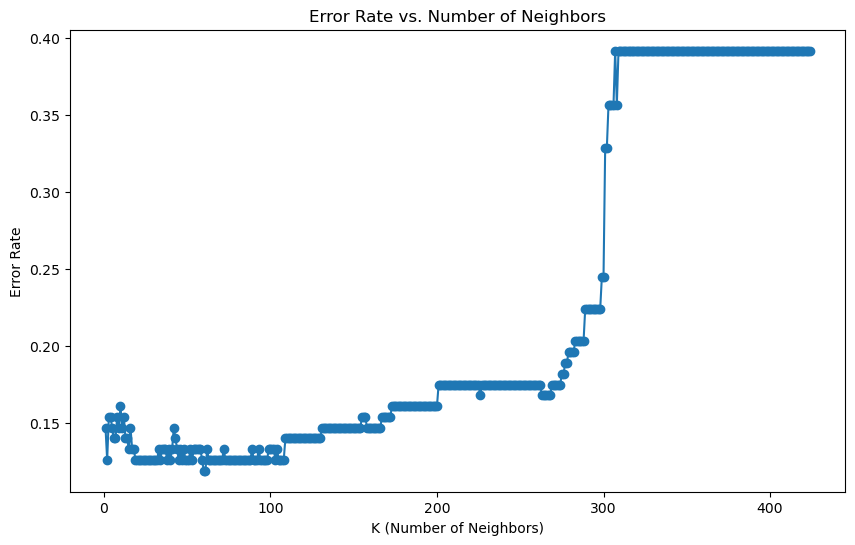

In [11]:
import matplotlib.pyplot as plt
# Visualize the error rates for each value of k
# Notice the error rate decreases as k increases until it reaches a minimum and then begins to increase again
# The shape created by this incremental reduction to a minimum error rate and then subsequent increase is called an elbow
# The optimal value of k is the value at the elbow and therefore where this method get's its name.

# Set the size of the figure
ten_inch_by_six_inch_figure_size = (10, 6)
# create a figure to plot the error rates
plt.figure(figsize=ten_inch_by_six_inch_figure_size)
# specify x coordinates using the values of k
x_values = range(1, largest_k)
# specify the corresponding y coordinates using the error rates
y_values = error_rates
# Use circles to represent the data points
marker_shape = 'o'

# plot the error rates such that each data point is 
# the combination of an element of x_values and an element of y_values
# at corresponding indexes.
plt.plot(
    x_values,
    y_values,
    marker=marker_shape
)
# Set the title of the plot
plt.title('Error Rate vs. Number of Neighbors')
# Set the label of the x axis
plt.xlabel('K (Number of Neighbors)')
# Set the label of the y axis
_ = plt.ylabel('Error Rate')

In [12]:
# construct an instance of a K-Nearest Neighbor classifier with the most effective value of k
classifier = KNeighborsClassifier(n_neighbors=best_k)
# train the classifier on the training set
classifier.fit(X_train, y_train)
# produce a vector of labels arrived at by the classifier using the testing data
y_pred = classifier.predict(X_test)
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n{}".format(cm))
# compute the classification report
report = classification_report(y_test, y_pred, target_names=dataset.target_names)
print(report)

Confusion Matrix: 
[[44 12]
 [ 5 82]]
                       precision    recall  f1-score   support

 normal breast tissue       0.90      0.79      0.84        56
primary breast cancer       0.87      0.94      0.91        87

             accuracy                           0.88       143
            macro avg       0.89      0.86      0.87       143
         weighted avg       0.88      0.88      0.88       143



Confusion matrix

|     | predicted normal breast tissue     | predicted primary breast cancer |
| --- | ------- | ------- |
| actually normal breast tissue | 44 | 12  |
| actually primary breast cancer | 5 | 82 |

Accuracy: 88%.
> The number of times the model predicted normal breast tissue or primary breast cancer and it was actually normal breast tissue or primary breast cancer respectively over the total number of predictions.

Precision (per class):
  - normal breast tissue: 90%
  - primary breast cancer: 87%
> The number of times model predicted the class and it was actually the class over the number of times model predicted the class
>
>  The false positives cases that represent the occurrences of the modeling predicting breast cancer when it was not breast cancer are surfaced here. Poor precision might be less important in this domain since the set of cells determined to be cancerous will be reviewed in more detail by doctors at which time the false positives can be removed from the set.

Recall (per class):
  - normal breast tissue: 79%
  - primary breast cancer: 94%
> The number of times the model predicted the class and it was actually the class over the number of times it was actually the class
>
> The false negative cases that represent the occurrences of the modeling not predicting breast cancer when it was actually breast cancer are surfaced with this measurement. Poor recall might be more important in this domain since the set of cells determined to be cancerous will not include instances that were actually cancerous and may not be reviewed in more detail by a doctor. In order for the model to be reliable we want to err on the side of over predicting cancer cells and never predict a cancerous sample to be normal.

F-score (per class):
  - normal breast tissue: 84%
  - primary breast cancer: 91%
> Harmonic mean of the precision and recall. Calculated as twice the product of the precision and recall divided by the sum of the precision and recall.
>
> The f-score is useful for evaluating the overall performance of the model because it provides a single number to summarize the precision and recall of the model across all classes. A high score indicates the model has high recall and high precision. High scores also indicate the model predicts a cell is cancerous when it is actually cancerous while avoiding predicting a cell is cancerous when it is actually normal and also avoids predicting a cell is normal when it is actually cancerous.